# Movie Ratings Analysis Using NumPy, Pandas & Matplotlib


- Dataset: IMDB 5000 Movie Dataset
- Source: Kaggle (Original data sourced from IMDb)
- Time Period Covered: 1920 – 2016
- Platform Used: Google Colab
- Objective: To analyze movie ratings, budgets, revenues, and trends over time using Python-based data analysis and visualization techniques.

- Source data link: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/movie_metadata.csv')

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


####  Data Cleaning


* Drop or fill missing data to prepare for analysis.

In [ ]:
df = df.dropna(subset=['imdb_score', 'budget', 'gross', 'title_year', 'genres', 'director_name'])


*Handling Null values in columns*

In [ ]:
df.loc[:, 'color'] = df['color'].fillna('Unknown')
df.loc[:, 'language'] = df['language'].fillna('Unknown')
df.loc[:, 'country'] = df['country'].fillna('Unknown')
df.loc[:, 'content_rating'] = df['content_rating'].fillna('Unrated')
df.loc[:, 'aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].median())
df.loc[:, 'plot_keywords'] = df['plot_keywords'].fillna('Unknown')


In [ ]:
df.isna().sum()

,0
color,0
director_name,0
num_critic_for_reviews,1
duration,1
director_facebook_likes,0
actor_3_facebook_likes,10
actor_2_name,5
actor_1_facebook_likes,3
gross,0
genres,0


### Statistical Analysis with NumPy
* Compute mean, median, and standard deviation of movie ratings.

In [ ]:
ratings = df['imdb_score'].values #converting the imbd_score column into numpy array

In [ ]:
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
std_rating = np.std(ratings)


*mean, median and standard deviation of movie ratings*

In [ ]:
print(f"Mean IMDb Rating: {mean_rating:.2f}")
print(f"Median IMDb Rating: {median_rating:.2f}")
print(f"Standard Deviation of IMDb Ratings: {std_rating:.2f}")


Mean IMDb Rating: 6.46
Median IMDb Rating: 6.60
Standard Deviation of IMDb Ratings: 1.06


* Performing similar analysis on budget and revenue

In [ ]:
budgets = df['budget'].values #converting into numpy arrays
revenues = df['gross'].values

* mean, median and standard deviation of budget

In [ ]:
mean_budget = np.mean(budgets)
median_budget = np.median(budgets)
std_budget = np.std(budgets)


* mean, median and standard deviation of revenue

In [ ]:
mean_revenue = np.mean(revenues)
median_revenue = np.median(revenues)
std_revenue = np.std(revenues)


*Output*

In [ ]:
print(f"Mean Budget: {mean_budget:,.2f}")
print(f"Median Budget: {median_budget:,.2f}")
print(f"Standard Deviation of Budget: {std_budget:,.2f}\n")

print(f"Mean Revenue: {mean_revenue:,.2f}")
print(f"Median Revenue: {median_revenue:,.2f}")
print(f"Standard Deviation of Revenue: {std_revenue:,.2f}")


Mean Budget: 45,210,278.28
Median Budget: 24,000,000.00
Standard Deviation of Budget: 222,360,879.50

Mean Revenue: 51,054,995.24
Median Revenue: 27,979,400.00
Standard Deviation of Revenue: 69,793,514.11


## Grouped Analysis with Pandas
* Group by Genre and compute average ratings.

In [ ]:
df.loc[:, 'primary_genre'] = df['genres'].str.split('|').str[0]  #extracting primary genre


In [ ]:
df['primary_genre']

,primary_genre
0,Action
1,Action
2,Action
3,Action
5,Action
...,...
5033,Drama
5034,Thriller
5035,Action
5037,Comedy


In [ ]:
genre_avg_rating = df.groupby('primary_genre')['imdb_score'].mean()


In [ ]:
genre_avg_rating = genre_avg_rating.sort_values(ascending=False)

* Average Rating by Genre

In [ ]:
genre_avg_rating


,imdb_score
primary_genre,
Biography,7.153846
Documentary,6.951163
Crime,6.936538
Drama,6.813533
Western,6.766667
Animation,6.763043
Musical,6.750000
Mystery,6.608333
Sci-Fi,6.587500


* Group by Director to analyze average rating per director.

In [ ]:
director_avg_rating = df.groupby('director_name')['imdb_score'].mean()


In [ ]:
director_avg_rating = director_avg_rating.sort_values(ascending=False)

* Average Rating DIrector Wise, of top 10 Director

In [ ]:
director_avg_rating.head(10)


,imdb_score
director_name,
Tony Kaye,8.600000
Charles Chaplin,8.600000
Ron Fricke,8.500000
Alfred Hitchcock,8.500000
Majid Majidi,8.500000
Damien Chazelle,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000
Richard Marquand,8.400000


## Group by Year to analyze rating trends over time.

*Making sure title_year column is Year format not a float*

In [ ]:
df.loc[:, 'title_year'] = df['title_year'].astype(int)

In [ ]:
yearly_avg_rating = df.groupby('title_year')['imdb_score'].mean() #group by year


In [ ]:
yearly_avg_rating = yearly_avg_rating.sort_index()

* Average Rating over the year

In [ ]:
yearly_avg_rating

,imdb_score
title_year,
1920,4.800000
1927,8.300000
1929,6.300000
1933,7.700000
1935,7.800000
...,...
2012,6.486747
2013,6.561988
2014,6.415094


## Visualizations with Matplotlib

* Bar Plot:Average rating by genre and by director.


*Bar Plot Average Rating by Genre*

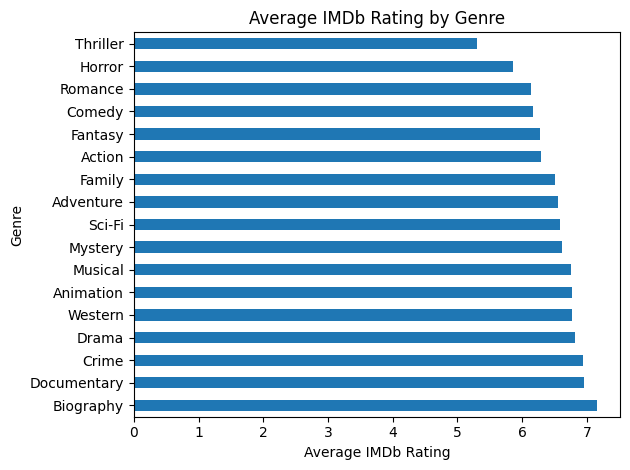

In [ ]:
plt.figure()
genre_avg_rating.plot(kind='barh')
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


*Bar Plot, Average Rating By Director*

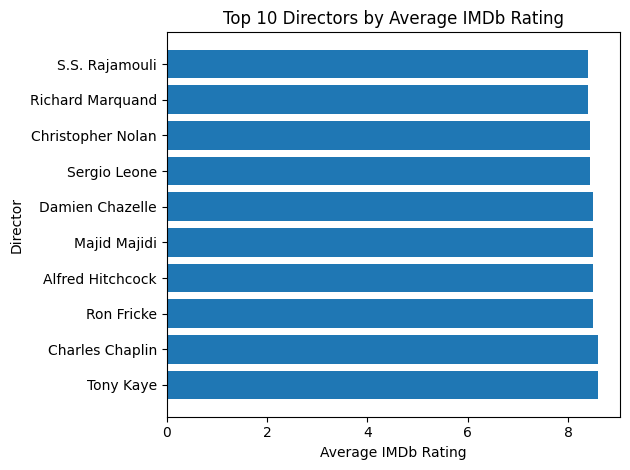

In [ ]:
top_directors = director_avg_rating.head(10)

plt.figure()
plt.barh(top_directors.index, top_directors.values)
plt.title("Top 10 Directors by Average IMDb Rating")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Director")
plt.tight_layout()
plt.show()




## Line Plot, Average ratings over years.

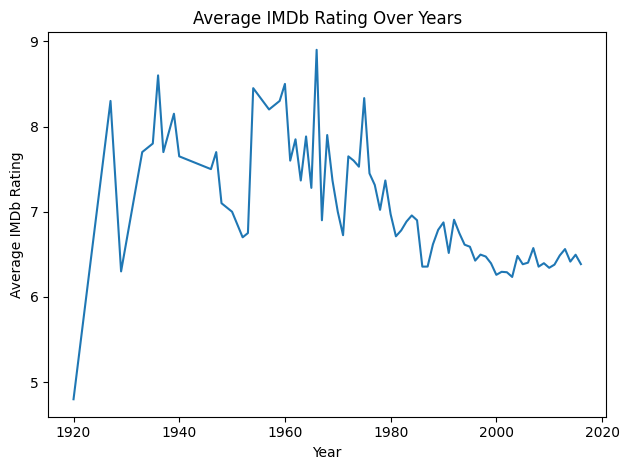

In [ ]:
plt.figure()
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values)
plt.title("Average IMDb Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average IMDb Rating")
plt.tight_layout()
plt.show()


## Scatter Plot, Budget vs. Rating, Revenue vs. Rating.
* Budget vs. Rating

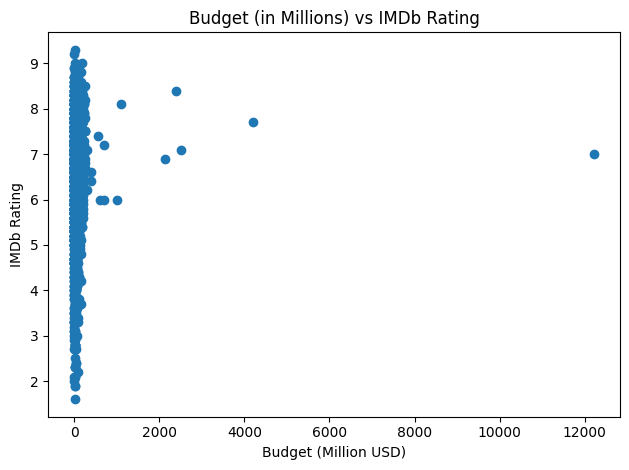

In [ ]:
plt.figure()
plt.scatter(df['budget'] / 1_000_000, df['imdb_score'])
plt.title("Budget (in Millions) vs IMDb Rating")
plt.xlabel("Budget (Million USD)")
plt.ylabel("IMDb Rating")
plt.tight_layout()
plt.show()


* Scatter Plot — Revenue vs IMDb Rating

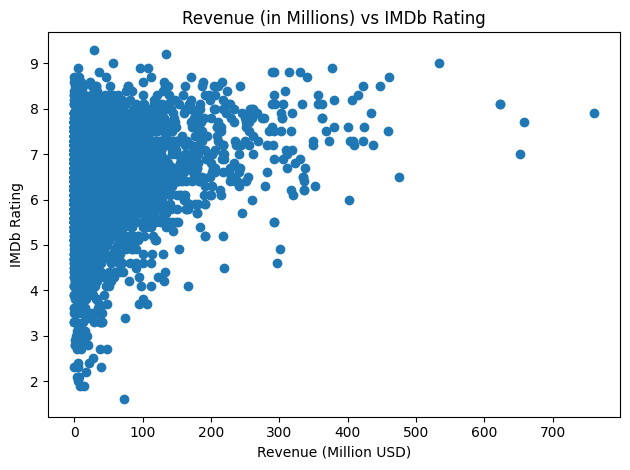

In [ ]:
plt.figure()
plt.scatter(df['gross'] / 1_000_000, df['imdb_score'])
plt.title("Revenue (in Millions) vs IMDb Rating")
plt.xlabel("Revenue (Million USD)")
plt.ylabel("IMDb Rating")
plt.tight_layout()
plt.show()


## Horizontal Bar Plot, Top-rated movies by rating.

In [ ]:
top_movies = df.sort_values(by='imdb_score', ascending=False).head(10) # sorting top rated movies


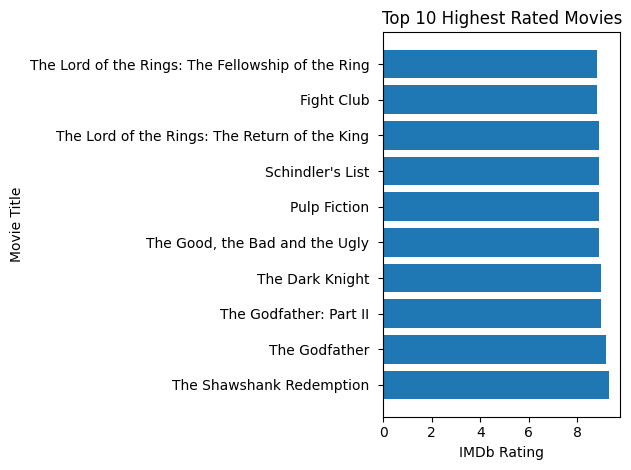

In [ ]:
plt.figure()
plt.barh(top_movies['movie_title'], top_movies['imdb_score'])
plt.title("Top 10 Highest Rated Movies")
plt.xlabel("IMDb Rating")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()


# Notebook Summary

- This project analyzes the IMDb 5000 Movies dataset to identify patterns behind highly-rated films. It examines how IMDb scores vary with budget, revenue, release year, primary genre, and director performance. The analysis includes trend evaluation across decades, comparison of top-rated genres and directors, and relationships between financial metrics and audience ratings. The results highlight which genres consistently outperform others, which directors have the strongest average ratings, and how rating patterns have shifted over time.
